In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r"C:\Users\Administrator\Downloads\Walmart (1).csv")

df.head()





,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.shape


(6435, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Data Cleaning
#Date column convert


In [7]:
# 'dayfirst=True' Pandas ko batata hai ki pehla number 'Day' hai, 'Month' nahi.
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [8]:
# Check karne ke liye ki change hua ya nahi
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None


In [9]:
#Missing values check
df.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
#Feature Engineering
# Naye columns banana (Feature Engineering)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


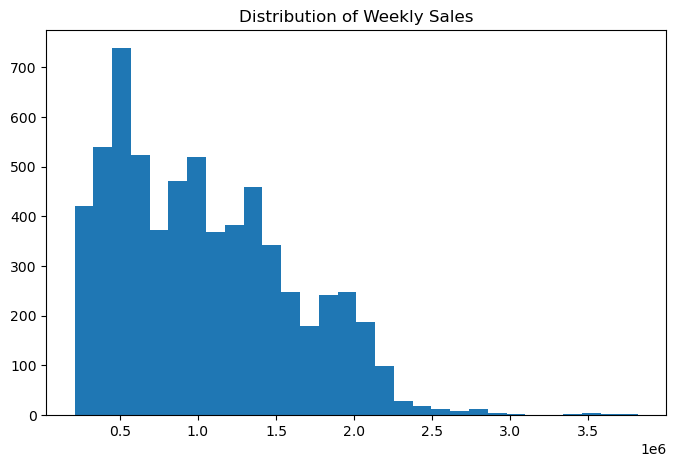

In [12]:
#Exploratory Data Analysis (EDA)
#Weekly Sales Distribution
plt.figure(figsize=(8,5))
plt.hist(df['Weekly_Sales'], bins=30)
plt.title("Distribution of Weekly Sales")
plt.show()


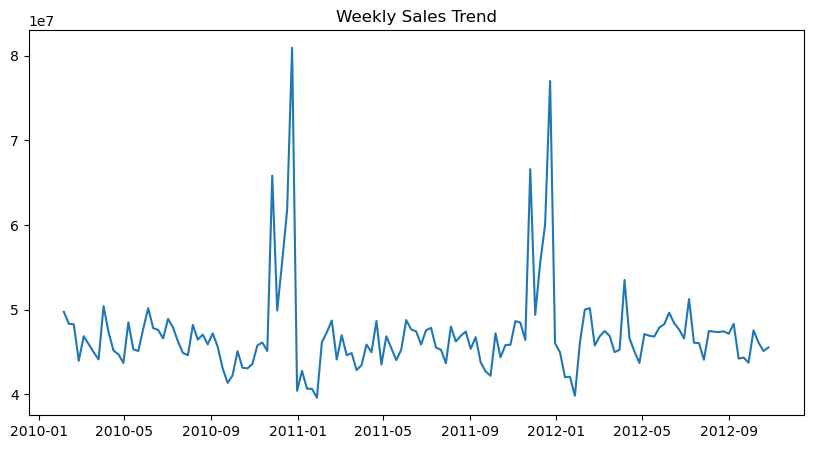

In [13]:
#Sales Trend Over Time
plt.figure(figsize=(10,5))
plt.plot(df.groupby('Date')['Weekly_Sales'].sum())
plt.title("Weekly Sales Trend")
plt.show()


In [14]:
#Holiday vs Non-Holiday Sales
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()


Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [15]:
#Feature Selection
X = df[['Store', 'Holiday_Flag', 'Temperature',
        'Fuel_Price', 'CPI', 'Unemployment',
        'Year', 'Month']]

y = df['Weekly_Sales']


In [16]:
#Train–Test Split (Time Based)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)


In [17]:
#Model Building (Random Forest)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [18]:
#Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

pred = rf.predict(X_test)

MAE = mean_absolute_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))

MAE, RMSE


(431061.96844401705, 558954.3297587911)

#Random Forest achieved lower prediction error compared to baseline models.

In [19]:
#Model Save (Submission)
import pickle

with open("walmart_sales_model.pkl", "wb") as f:
    pickle.dump(rf, f)


#Final Conclusion
#The Walmart sales forecasting project successfully analyzed historical sales data and developed a machine learning model to predict future sales. The Random Forest model captured seasonal and economic patterns effectively, helping improve inventory planning and demand forecasting.

#This project uses machine learning to forecast retail sales and support inventory optimization